In [1]:
import PIL as pillow
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import SimpleITK as sitk

ATTENTION_GIF_DIR_DIR = f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention"
ATTENTION_IMG_DIR = f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs"

In [2]:
%matplotlib widget

In [3]:
def get_frames_from_gif(gif_path):
    gif = pillow.Image.open(gif_path)
    frames = []
    while True:
        frames.append(np.array(gif))
        try:
            gif.seek(gif.tell() + 1)
        except EOFError:
            break
    
    return frames

In [9]:
def get_frames_from_mha(mha_path):
    img = sitk.ReadImage(mha_path, outputPixelType=sitk.sitkVectorUInt8)
    print(img.GetSize())
    arr = sitk.GetArrayFromImage(img)
    return arr

In [5]:
def show_gif_slider(path, seriesuid):
    # Load the GIF using PIL (Pillow)
    # frames = get_frames_from_gif(path)
    frames = get_frames_from_mha(path)

    # Number of frames in the GIF
    num_frames = len(frames)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.subplots_adjust(bottom=0.25)
    im = ax.imshow(frames[0], cmap='gray')

    ax.axis('off')

    # Add the slider
    ax_slider = plt.axes([0.1, 0.02, 0.8, 0.03], facecolor='lightgoldenrodyellow')
    slider = Slider(ax_slider, 'Frame', 0, num_frames-1, valinit=0, valstep=1)

    # Update function for the slider
    def update(val):
        frame_idx = int(slider.val)
        im.set_data(frames[frame_idx])
        fig.canvas.draw_idle()

    # Attach the update function to the slider
    slider.on_changed(update)
    plt.show()

Scroll code (from Tijmen's repository).

In [6]:
def show_gif_scroll(gif_path):
    frames = get_frames_from_gif(gif_path)
    fig, ax = plt.subplots(1, 1)
    tracker = IndexTracker(ax, frames)
    fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
    plt.show()

class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.slices = len(X)
        self.ind = self.slices // 2

        self.im = ax.imshow(self.X[self.ind], cmap="gray")
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [7]:
df = pd.read_csv(f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_fn_brock_top25.csv")

### 1.2.840.113654.2.55.241924049353992159785903857377772231263

Age                         58
Gender                       1
race                       1.0
FamilyHistoryLungCa      False
Emphysema                 True
Diameter [mm]             63.1
NoduleInUpperLung        False
PartSolid                False
NoduleCounts                 3
Spiculation              False
CoordX                   41.33
CoordY                   70.42
CoordZ                 1487.98
loclup                     0.0
locrup                     0.0
Name: 0, dtype: object

VectorImage (00000209D2488F40)
  RTTI typeinfo:   class itk::VectorImage<unsigned char,3>
  Reference Count: 1
  Modified Time: 2336
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 2308
  UpdateMTime: 2332
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [3, 512, 512]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [3, 512, 512]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [3, 512, 512]
  Spacing: [1, 1, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  VectorLength: 1
  PixelContainer: 
    ImportImageContainer (00000209D2C281B0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,unsigned char>
      Refer

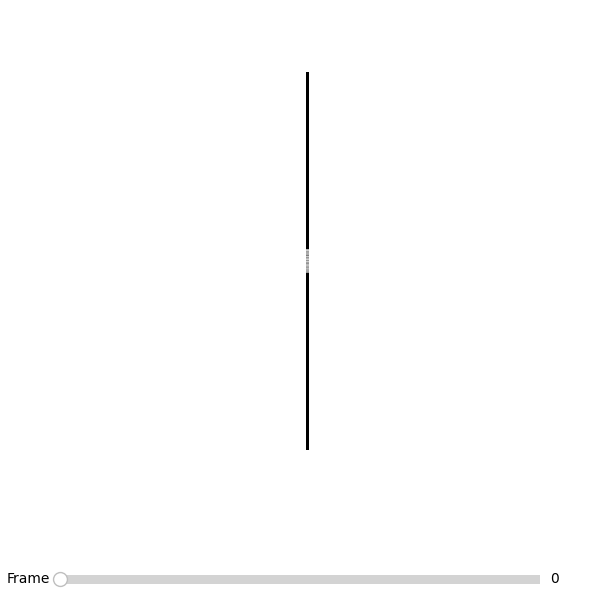

In [11]:
pancan_cols = ['Age', 'Gender', 'race', 'FamilyHistoryLungCa', 'Emphysema', 'Diameter [mm]', 'NoduleInUpperLung', 'PartSolid', 'NoduleCounts', 'Spiculation']
nodule_loc = ["CoordX", "CoordY", "CoordZ", "loclup", "locrup"]

cols_to_show = pancan_cols + ['weight', 'BMI', 'Adenocarcinoma', 'Squamous_cell_carcinoma', 'diaghype', 'wrkasbe', 'wrkfoun', 'cigar', 'pipe']

ATTENTION_DIR = f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_mha_direct"
series = ['1.3.6.1.4.1.14519.5.2.1.7009.9004.336832610089461934819661898582']
series = df['SeriesInstanceUID'].tolist()
for i in range(1):
    seriesuid = series[i]
    display(Markdown(f"### {seriesuid}"))
    display(df.iloc[i][pancan_cols + nodule_loc])   
    gif_path = f"{ATTENTION_DIR}/serie_{seriesuid}.mha"
    show_gif_slider(gif_path, seriesuid)
    # show_gif_scroll(gif_path)